# 17 Singular Value Decomposition
__Math 3280 - Data Mining__ : Snow College : Dr. Michael E. Olson

* Brunton, Chapter 1, Sections 1.1-1.4
-----

## Mathematical Overview

We start off with a matrix of data,
$$X = \begin{bmatrix}
\vdots & \vdots & \dots & \vdots\\
x_1 & x_2 & \dots & x_m\\
\vdots & \vdots & \dots & \vdots
\end{bmatrix}$$

This could be any dataset with $n$ rows and $m$ columns. For example, we will work with images later. If we want to compare $m$ images with $n$ pixels, then we reshape the image data to be a single column. $X$ would then be a matrix of $m$ pictures, where each column is a single image of length $n$.

$X$ is an $n$ x $m$ matrix, which we want to decompose as a product,
$$X=U\Sigma V^T$$
$$X = \begin{bmatrix}
\vdots & \vdots & \dots & \vdots\\
u_1 & u_2 & \dots & u_n\\
\vdots & \vdots & \dots & \vdots
\end{bmatrix}\begin{bmatrix}
\sigma_1 & 0 & \dots & 0 \\
0 & \sigma_2 & \dots & 0 \\
\vdots & \vdots & \dots & \vdots \\
0 & 0 & \dots & \sigma_m \\
0 & 0 & \dots & 0\\
\vdots & \vdots & \dots & \vdots
\end{bmatrix}\begin{bmatrix}
\dots & v_1 & \dots \\
\dots & v_2 & \dots \\
\dots & \vdots & \dots \\
\dots & v_m & \dots
\end{bmatrix}$$

A few things to note:
* $U$ and $V$ are orthonormal
  * Orthogonal: All basis vectors are perpendicular to each other
  * Orthonormal: All basis vectors are orthogonal with a unit length (each basis has a length of 1)
* $U$ and $V$ are unitary
  * $UU^T=U^TU=\mathbb{I}$
  * $U^{-1}$ = $U^T$

| $U$ | $\Sigma$ | $V$ |
| --- | --- | --- |
| $\mathbb{C}^{n\times n}$ | $\mathbb{C}^{n\times m}$ | $\mathbb{C}^{m\times m}$ |

* $\Sigma$ is diagonal, non-negative, hierarchically ordered ($\sigma_1 \ge \sigma_2 \ge \dots \ge \sigma_m$)
  * The first column of $U$ and first row of $V^T$ are thus more important than the following columns
  * The elements of $\Sigma$ are called singular values ($\sigma_i$)
  * Since it is diagonal, there will only be $m$ singular values, and rows $m+1$ through $n$ are just zeroes

*SVD*'s are guaranteed to exist
* We can use this method when other methods fail

### Economy SVD

Take the product $U\Sigma$:
$$U\Sigma = \begin{bmatrix}
\vdots & \vdots & \dots & \vdots\\
u_1 & u_2 & \dots & u_n\\
\vdots & \vdots & \dots & \vdots
\end{bmatrix}\begin{bmatrix}
\sigma_1 & 0 & \dots & 0 \\
0 & \sigma_2 & \dots & 0 \\
\vdots & \vdots & \dots & \vdots \\
0 & 0 & \dots & \sigma_m \\
0 & 0 & \dots & 0\\
\vdots & \vdots & \dots & \vdots
\end{bmatrix} = \begin{bmatrix}
\vdots & \vdots & \dots & \vdots & 0 & \dots & 0 \\
\sigma_1 u_1 & \sigma_2 u_2 & \dots & \sigma_m u_m & 0 & \dots & 0 \\
\vdots & \vdots & \dots & \vdots & 0 & \dots & 0 
\end{bmatrix}$$
Notice that $u_{m+1}$ through $u_n$ don't even matter. We can thus eliminate them. We define $\hat{U}$ and $\hat{\Sigma}$ as,
$$\hat{U} = \begin{bmatrix}
\vdots & \vdots & \dots & \vdots\\
u_1 & u_2 & \dots & u_m\\
\vdots & \vdots & \dots & \vdots
\end{bmatrix}$$
$$\hat{\Sigma} = \begin{bmatrix}
\sigma_1 & 0 & \dots & 0 \\
0 & \sigma_2 & \dots & 0 \\
\vdots & \vdots & \dots & \vdots \\
0 & 0 & \dots & \sigma_m
\end{bmatrix}$$

Our matrix $X$ could then still be defined using the __economy SVD__:
$$X=\hat{U}\hat{\Sigma}V^T$$


| $U$ | $\Sigma$ | $V$ | | $\hat{U}$ | $\hat{\Sigma}$ | $V$ |
| --- | --- | --- | --- | --- | --- | --- |
| $\mathbb{C}^{n\times n}$ | $\mathbb{C}^{n\times m}$ | $\mathbb{C}^{m\times m}$ | | $\mathbb{C}^{n\times m}$ | $\mathbb{C}^{m\times m}$ | $\mathbb{C}^{m\times m}$ |

When we multiply this out, we get,
$$X=\sigma_1 u_1 v_1^T + \sigma_2 u_2 v_2^T + \dots + \sigma_m u_m v_m^T $$
* Note: $u_i v_i^T$ is an outer product, giving an $n\times m$ matrix.

Since $\sigma_1\ge\sigma_2\ge\dots$, the first term, $\sigma_1 u_1 v_1^T$, has the largest weight. Later terms have less weight. We can now approximate $X$ by taking only the first $r$ columns of $U$ instead of $m$ columns. We define $\tilde{U}$ as just the first $r$ columns of $U$.

Likewise, $\tilde{\Sigma}$ is the upper-left $r$ columns & rows, and $\tilde{V}$ is the first $r$ rows of $V$. The number $r$ is called the *rank*, and $X$ is approximated now as,
$$X\approx\tilde{U}\tilde{\Sigma}\tilde{V}^T$$

Note:
* $U$ and $V$ are square unitary matrices ($U^TU = UU^T = I$ and $V^TV = VV^T = I$)
* $\tilde{U}$ and $\tilde{V}$ are no longer square, so are not unitary ($\tilde{U}^T\tilde{U} = I$ and $\tilde{V}^T\tilde{V} = I$, but $\tilde{U}\tilde{U}^T \ne I$ and $\tilde{V}\tilde{V}^T \ne I$)

## Eckart-Young Theorem

Stated in 1936 and shows that this is the best approximation for $X$ for a rank-$r$
$$\underset{\tilde{X} s.t. rank(\tilde{X})=r}{argmin} ||X-\tilde{X}||_F=\tilde{U}\tilde{\Sigma}\tilde{V}^T$$

### Frobenius Norm

$$||A||_F = \sqrt{\sum_{i,j} (A_{ij})^2}$$

## Image Compression
Let's apply the SVD to images. It is difficult to work with RGB images as there are many layers to the image. Let's simplify this by only working with black-and-white images. So, we start by converting our image to grayscale. That way, we only have to deal with a single value between 0 and 255 to determine the brightness of each pixel.

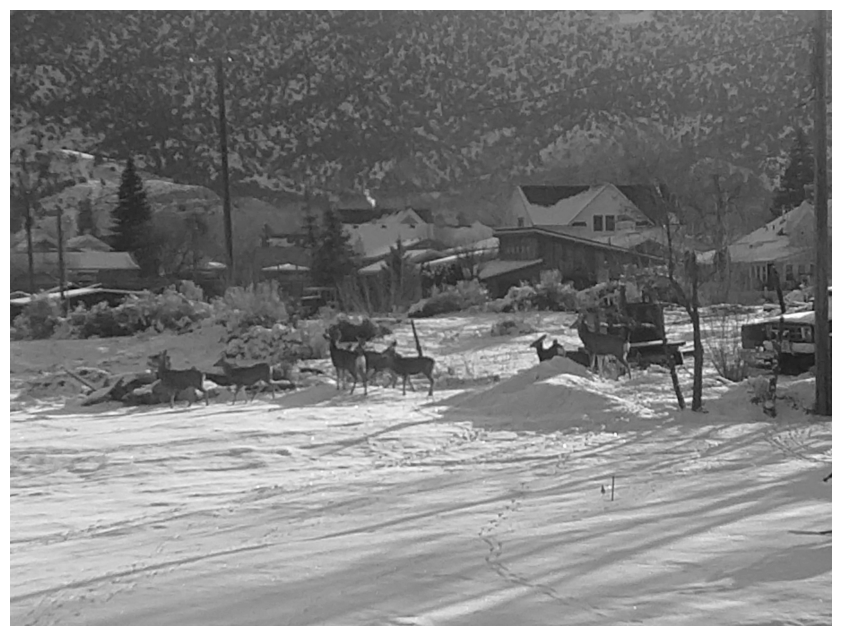

In [7]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]

#A = imread("Data/dog.jpg")
A = imread("../Data/deer.jpg")
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [8]:
np.shape(X)

(3024, 4032)

In [9]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

In [10]:
print(np.shape(S))
print(S)

(3024, 3024)
[[4.47453644e+05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.87715922e+04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.92425907e+04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.36760850e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.32764367e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.26156464e+00]]


Let's look at the singular values for this SVD.

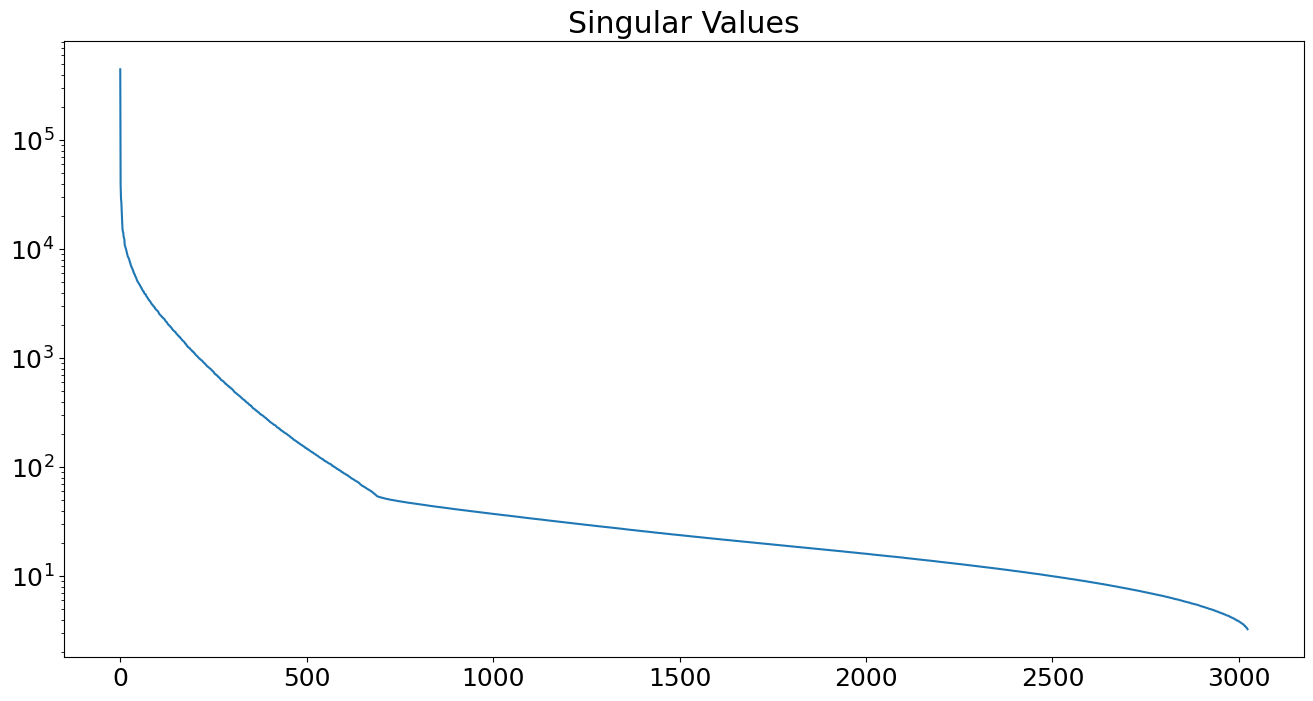

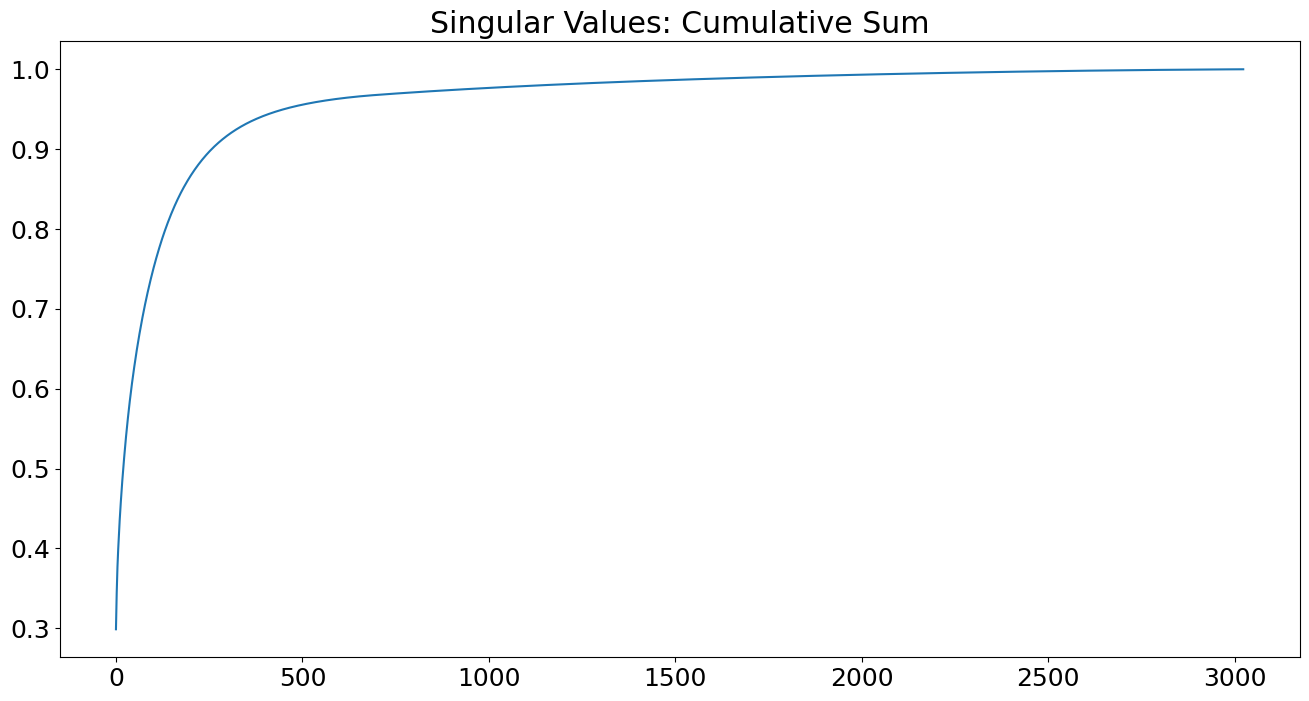

In [11]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

Notice that there is a significant decrease in each of the first ~700 singular values. This is where the majority of the information is going to be stored. In our cumulative sum graph, we see the quality of restoration as the y-axis. When we take the first 700 singular values, we get back over 95% of the data. For an image, this is enough. There is no need to keep all 3000+ singular values when 700 will give us almost everything.

Let's look at what the restoration of our SVD looks like with ranks 5, 20, 100, and 700.

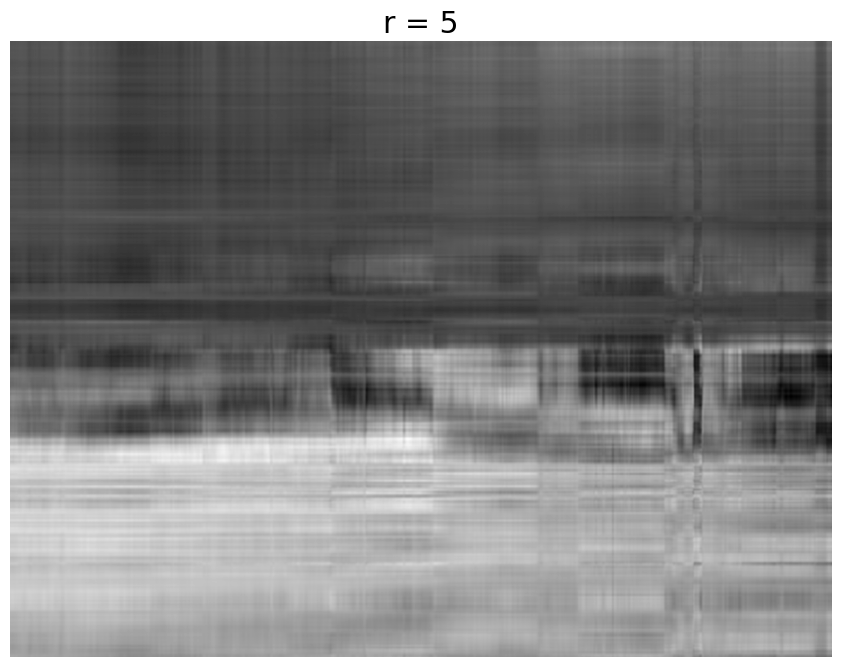

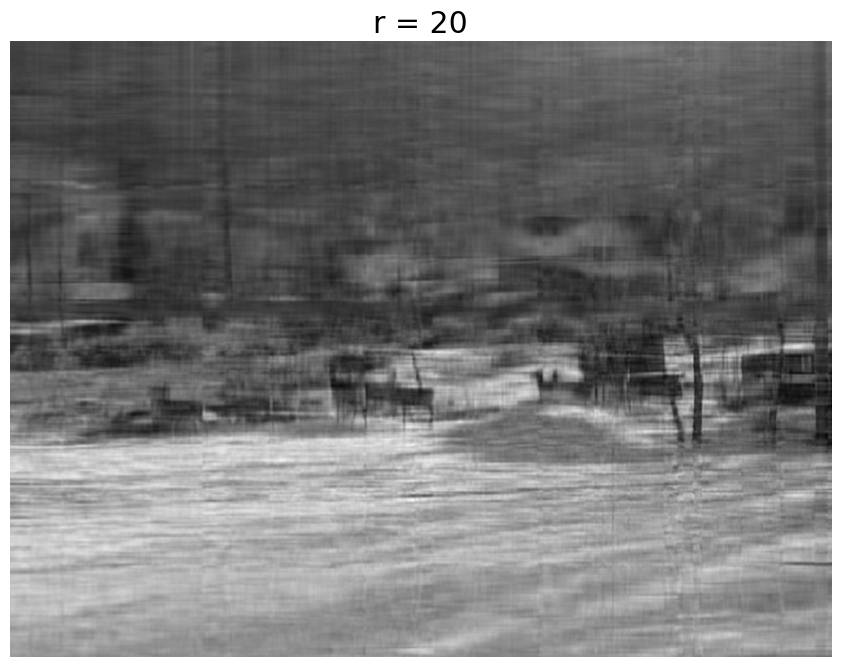

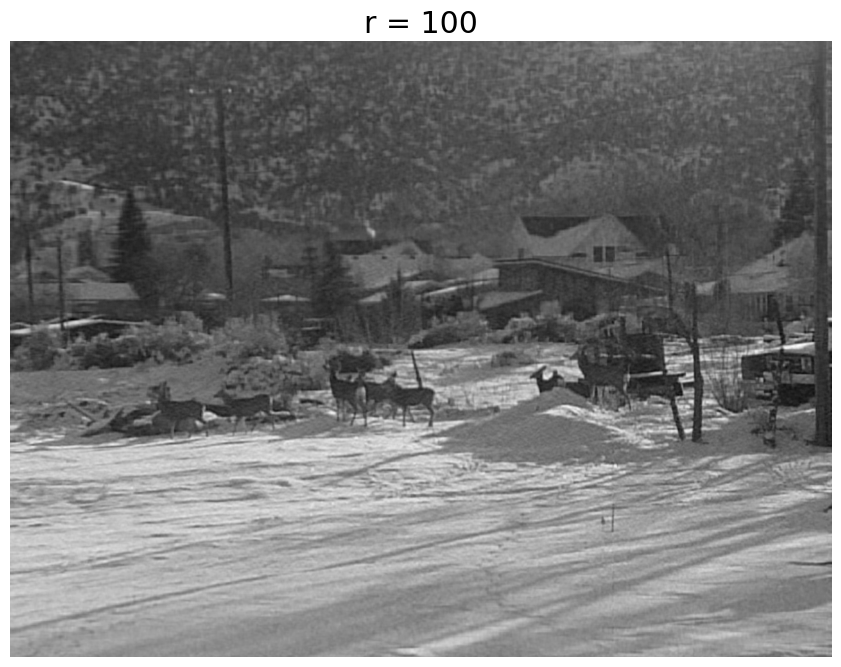

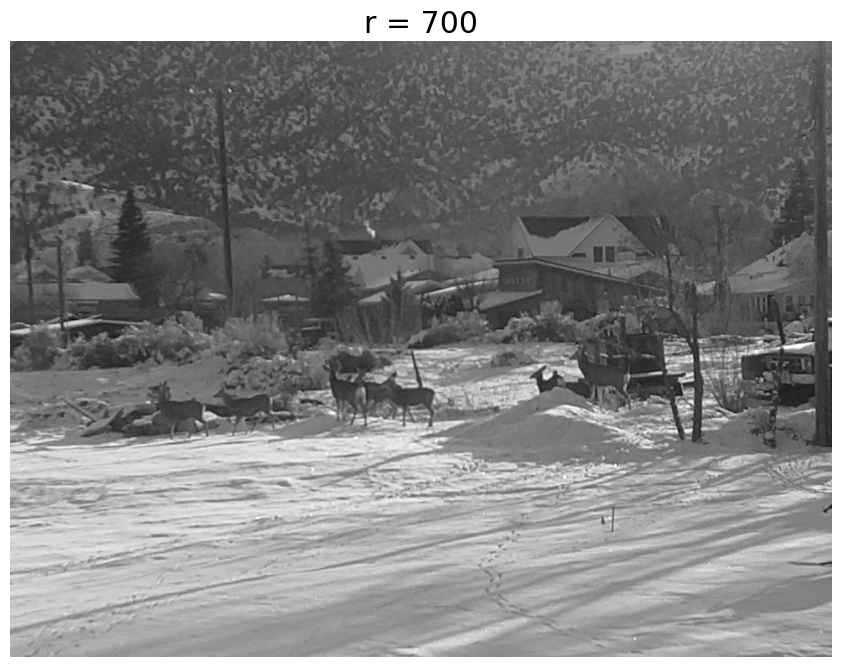

In [12]:
j = 1
for r in (5, 20, 100, 700):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

In [5]:
np.shape(U[:,:r])

(3024, 100)

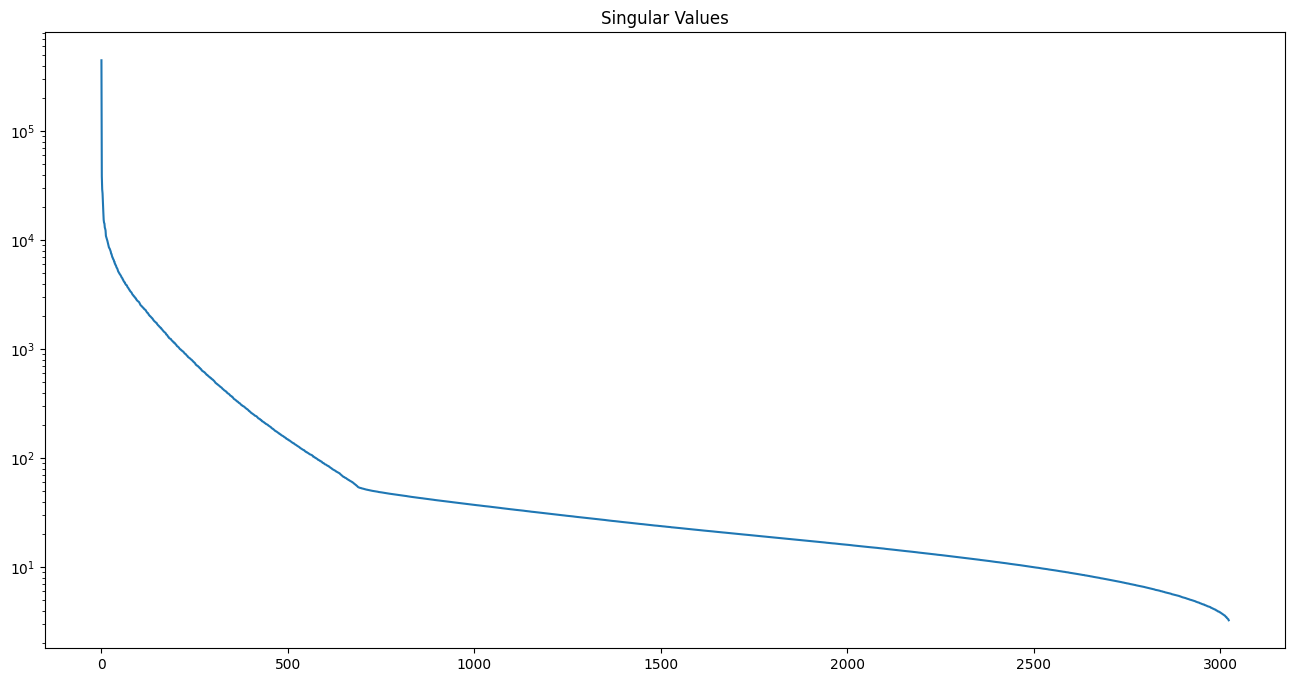

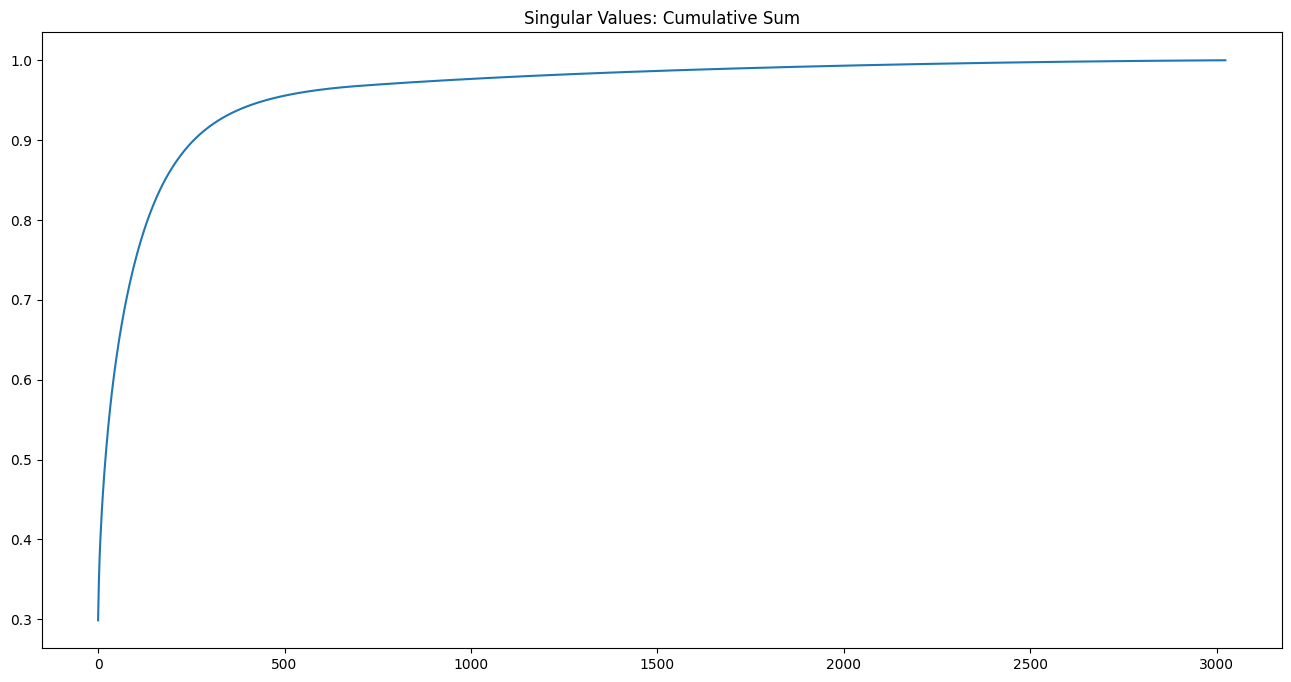

## Correlation Matrices

We can derive the matrices $U$ and $V$ using correlation matrices, although it is not very effective or practical, it is good to see how they fit into the SVD and where they come from.

The correlation of matrices can be found as, $A^TA$ or $AA^T$. Look at the first one:
$$A^TA = \begin{bmatrix}
\dots & a_1 & \dots \\
\dots & a_2 & \dots \\
\dots & \vdots & \dots \\
\dots & a_n & \dots
\end{bmatrix}\begin{bmatrix}
\vdots & \vdots & \dots & \vdots\\
a_1 & a_2 & \dots & a_n\\
\vdots & \vdots & \dots & \vdots
\end{bmatrix} = \begin{bmatrix}
a_1a_1 & \dots  & a_1a_n \\
\vdots & \ddots & \vdots \\
a_na_1 & \dots & a_na_n
\end{bmatrix}$$
or the set of inner products of the different vectors within $A$. If $A$ is unitary, then $A^TA=AA^T=\mathbb{I}$. 

For our original dataset, we can find the correlation matrix $X^TX$, which will result in an $m\times m$ matrix. 
* The first element would be $x_1^Tx_1$. The second $x_2^Tx_1$, and so on. So each element would be the inner product $x_i^Tx_j$.
* If the inner product is large, then there is a high correlation between the two vectors (e.g. images)
* If the inner product is small, then there is a low correlation

/tmp/ipykernel_4440/2022630485.py:1: RuntimeWarning: invalid value encountered in matmul
  img = plt.imshow(Xapprox.T @ Xapprox)


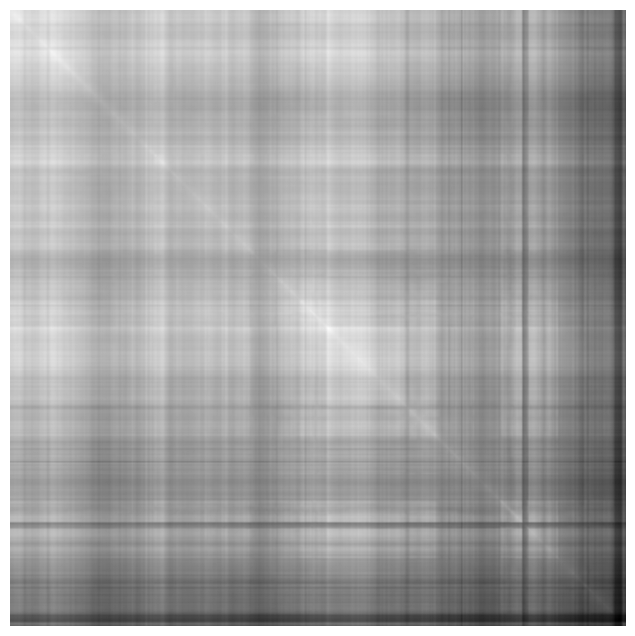

In [7]:
img = plt.imshow(Xapprox.T @ Xapprox)
img.set_cmap('gray')
plt.axis('off')
plt.show()

#### Reminder of Eigenvalues and Eigenvectors
$$Ax=\lambda x$$

#### Applying futher to SVD
So, what are $U$ and $V$? Let's look at the correlation matrix of $X$.
$$X = \hat{U}\hat{\Sigma}V^T \qquad X^T = (\hat{U}\hat{\Sigma}V^T)^T = V\hat{\Sigma}^T\hat{U}^T=V\hat{\Sigma}\hat{U}^T$$

$$X^TX=V\hat{\Sigma}\hat{U}^T\hat{U}\hat{\Sigma}V^T=V\hat{\Sigma}^2 V^T$$
$$(X^TX)V=V\hat{\Sigma}^2$$

This is similar to the basic eigenvector equation $Ax=\lambda x$. We would call $V$ the right-hand eigenvectors of the column-wise correlation.
* $V$ is just the set of eigenvectors to the correlation matrix $X^TX$
* $\Sigma$ is the square roots of the eigenvalues

Similarly,
$$(XX^T)\hat{U}=\hat{U}\hat{\Sigma}^2$$

$U$ would be the left-hand eigenvectors of the row-wise correlation. Using these correlations, we can actually derive $U$ and $V$. It's not an efficient method, however. $X^TX$ will be an $n\times n$ matrix, which is huge, so we'd rather avoid this. We typically use other methods instead, but using correlation matrices helps us to see where $U$ and $V$ come from.

## Things to note about the SVD

### Complex Transpose
We have been looking at $X$, $U$, and $V$ as if they are all in the real number system. It could be that entries within these matricies are complex. The complex transformation of a matrix $A$ would be indicated by $A^*$ and found by,
1. taking the transpose of the matrix
2. taking the complex conjugate of all complex values

Note that if there are no complex values, you can still follow these steps, and you still get the real-number transpose $A^T$.

Looking at the SVD using the complex transpose,
$$X = U\Sigma V^*$$

### Method of Snapshots

Often, the data is so large, we can't fit it into memory. How do we handle it?
* Take the first vector and find its inner product with itself --> $A_{11} = x_1^T x_1 = <x_1,x_1>$
* Take the first vector and find its inner produce with $x_2$ --> $A_{12} = x_1^T x_2 = <x_1,x_2>$
  * Also find its compliment --> $A_{21} = x_2^T x_1 = <x_2,x_1>$
* Continue until you have all of the elements of $A = X^T X$

You can then use this to get $V$. To get $\hat{U}$,
$$X = \hat{U}\hat{\Sigma}V^T \qquad\to\qquad \hat{U}=XV\hat{\Sigma}^{-1}$$

### Geometric Interpretation of SVD

#### Unitary Transformations

Recall that in the SVD,
$$X = U\Sigma V^T = \hat{U}\hat{\Sigma}V^T$$

$U$ and $V$ are unitary. That is,
$$U U^T = U^T U = \mathbb{I}_{mxm}$$
$$V V^T = V^T V = \mathbb{I}_{nxn}$$

If we say $X$ is an $m$ x $n$ matrix, then $U$ is $m$ x $m$, and $V$ is $n$ x $n$. Note that using the economy $\hat{U}$, then $\hat{U}^T \hat{U}=\mathbb{I}$, but $\hat{U} \hat{U}^T \ne \mathbb{I}$.

Unitary Transformations preserve vectors and lengths of vectors within a vector space. (Constellations are a good example – angles and distances between stars remain the same, even though they move from one side of the sky to the other.) Essentially, they just rotate vectors. This means, if I have two matrices x and y, then when they are both transformed,
$$<x,y> = <Ux,Uy> \forall x,y\in\mathbb{R}^n$$

The Fourier Transform is one of the most famous and most widely used unitary transforms. 

If $X$ is complex, that is if $X\in \mathbb{C}^{nxm}$, then $X^*$ is complex conjugate transpose. To take the complex conjugate transpose of a matrix,
* Transpose the matrix
* Take the complex conjugate of each element

#### Geometric Perspective

While $U$ and $V$ create unitary transformations, simply rotating the vector space, the matrix $X$ is not unitary. So, it can create a change in the space. Take a vector $v$ in the $\mathbb{R}^n$ space (a sphere). When we transform this with,
$$v \to Xv \qquad (\mathbb{R}^n \to \mathbb{R}^m)$$

Then it maps our basis of vectors into a rotated and changed ellipsoid. The length of the principle axes of the ellipsoid are given by the singular values of X. The left-singular matrix U would then tell orientation of the ellipsoid.

#### Demo of Geometric Perspective

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

### Set up rotation matrix
theta = np.array([np.pi/15, -np.pi/9, -np.pi/20])
Sigma = np.diag([3, 1, 0.5]) # scale x, then y, then z

# Rotation about x axis
Rx = np.array([[1, 0, 0],
               [0, np.cos(theta[0]), -np.sin(theta[0])],
               [0, np.sin(theta[0]), np.cos(theta[0])]])

# Rotation about y axis
Ry = np.array([[np.cos(theta[1]), 0, np.sin(theta[1])],
               [0, 1, 0],
               [-np.sin(theta[1]), 0, np.cos(theta[1])]])

# Rotation about z axis
Rz = np.array([[np.cos(theta[2]), -np.sin(theta[2]), 0],
               [np.sin(theta[2]), np.cos(theta[2]), 0],
               [0, 0, 1]])

# Rotate and scale
X = Rz @ Ry @ Rx @ Sigma

In [ ]:
### Take the SVD
U, S, VT = np.linalg.svd(X,full_matrices=False)
X2 = U @ np.diag(S)
print(X2)
print(S)

In [ ]:
### Plot sphere
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

### Plot the surface
surf1 = ax1.plot_surface(x, y, z, cmap='jet',alpha=0.6,facecolors=plt.cm.jet(z),linewidth=0.5,rcount=30,ccount=30)
surf1.set_edgecolor('k')
ax1.set_xlim3d(-2, 2)
ax1.set_ylim3d(-2, 2)
ax1.set_zlim3d(-2, 2)

xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        xR[i,j], yR[i,j], zR[i,j] = X @ [x[i,j], y[i,j], z[i,j]]
        
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(xR, yR, zR, cmap='jet',alpha=0.6,linewidth=0.5,facecolors=plt.cm.jet(z),rcount=30,ccount=30)
surf2.set_edgecolor('k')
ax2.set_xlim3d(-2, 2)
ax2.set_ylim3d(-2, 2)
ax2.set_zlim3d(-2, 2)
plt.show()

> Note that X can multiply wide, short vectors vX, or it can multiply long, skinny vectors Xv.

If X is not square, then it maps from one dimension to another. For example, if X is a 2x3 matrix, then it maps a 3D sphere into a 2D ellipsoid.